In [60]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [32]:
class LinearRegression:

    def __init__(self, learning_rate=0.001):
        self.lr = learning_rate
        self.weights = None
        self.bias = None

    def mse(self, y, preds):
        m = len(preds)
        cost = np.mean((preds - y)**2)
        return cost
    
    def fit(self, X, y, n_iters=1000):
        n_samples, n_features = X.shape

        # initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        loss_history = []
        # gradient descent
        for _ in range(n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            loss_history.append(self.mse(y_predicted, y))
        return loss_history
    
    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

    

In [33]:
# create a simple linear dataset
X = np.random.rand(100, 1)
# y = 2 + 3 * X + np.random.rand(100, 1)
y = 2 + 3 * X.ravel() + np.random.rand(100)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


None None
[3.13026788] 2.411796292383657


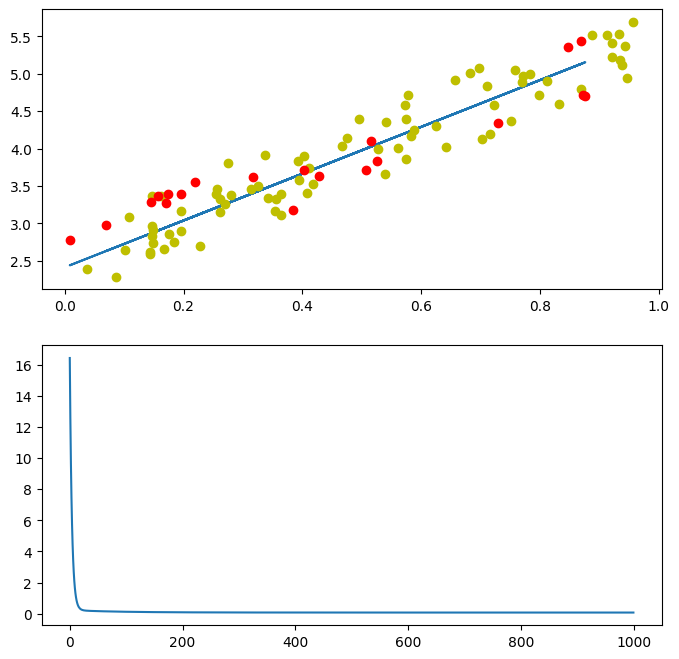

In [53]:
# our custom model
model = LinearRegression(learning_rate=0.1)
print(model.weights, model.bias)
loss = model.fit(X_train, y_train, n_iters = 1000)
y_pred = model.predict(X_test)
print(model.weights, model.bias)

fig, axs = plt.subplots(2, figsize=(8, 8))

axs[0].plot(X_test, y_pred)
axs[0].plot(X_train, y_train, 'yo')
axs[0].plot(X_test, y_test, 'ro')

axs[1].plot(loss)
# scikit-learn model
#model_sklearn = SklearnLinearRegression()
#model_sklearn.fit(X_train, y_train)
#y_pred_sklearn = model_sklearn.predict(X_test)

In [78]:
class BinaryLogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
         
    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-8
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)
    '''
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-8  
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.sum(y_true * np.log(y_pred + epsilon), axis = 1).mean()
        return loss
    '''

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

(360, 64)


<Figure size 640x480 with 0 Axes>

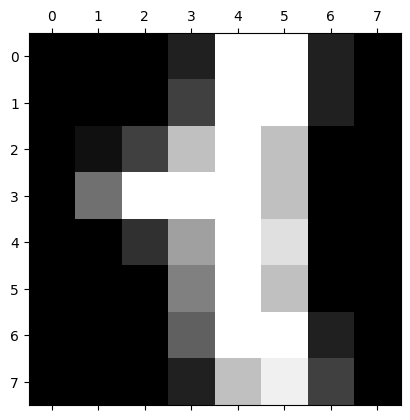

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

dataset = datasets.load_digits(n_class = 2)
X, y = dataset.data, dataset.target
print(dataset.data.shape)
plt.gray()
plt.matshow(dataset.images[5])
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

regressor = BinaryLogisticRegression(learning_rate=0.0001, n_iters=10000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
confusion_matrix(np.asarray(y_test), np.asarray(predictions))
#print("Test accuracy: {0:.3f}".format(accuracy))
#print("Confusion Matrix:",np.array(cm))

array([[30,  0],
       [ 0, 42]])

In [88]:
class MulticlassLogisticRegression:
    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
    
    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

0.78


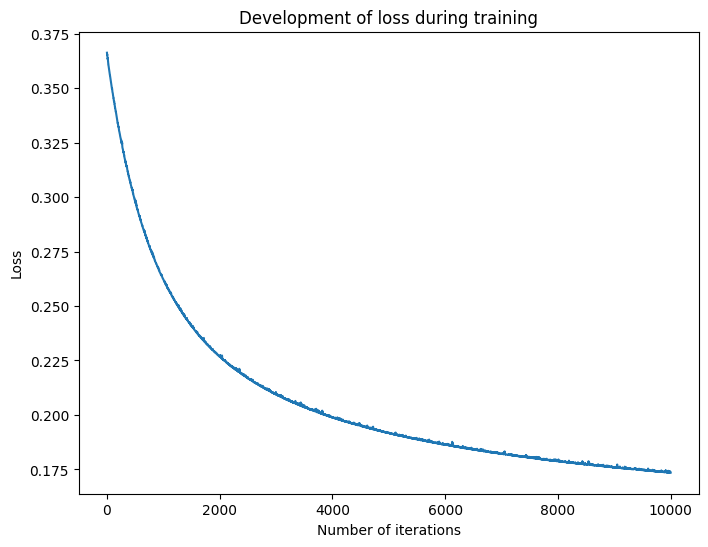

In [105]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target
logreg = MulticlassLogisticRegression(thres=1e-5)
logreg.fit(X,y,lr=0.0001)
print(logreg.score(X, y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(logreg.loss)), logreg.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

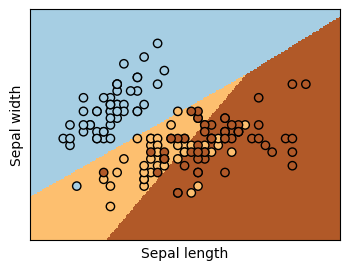

In [108]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_ = logreg.predict_classes(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

0.9654980523094046


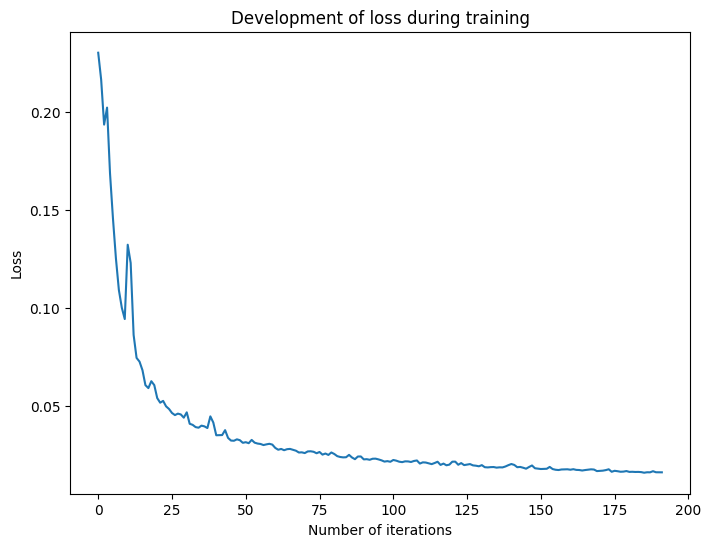

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 176,   2,   0,   0,   0,   1,   0,   1,   2],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2, 175,   0,   1,   0,   2,   1,   1],
       [  1,   0,   0,   0, 176,   0,   0,   1,   0,   3],
       [  1,   0,   0,   0,   1, 176,   1,   0,   0,   3],
       [  0,   4,   0,   0,   0,   1, 175,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177,   1,   1],
       [  0,  12,   1,   2,   0,   3,   1,   1, 153,   1],
       [  0,   1,   0,   1,   0,   3,   0,   0,   2, 173]])

In [100]:
digits = datasets.load_digits()
X = digits.data 
Y = digits.target
logreg = MulticlassLogisticRegression()
logreg.fit(X,Y, lr=0.0001)

pre = logreg.predict_classes(X)
print(logreg.score(X,Y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(logreg.loss)), logreg.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()
confusion_matrix(np.asarray(Y), np.asarray(pre))